In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.2 MB/s eta 0:00:00


In [3]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ad65fe16f59fa84d85af1bf01987b621c9cb5e986a8b5213d3119411bb2a3f6d
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [8]:
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.9 MB/s eta 0:00:00


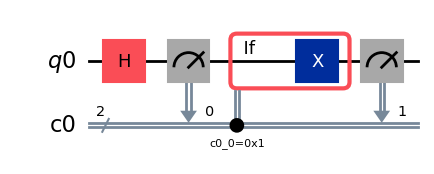

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(1)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# unpack the qubit and classical bits from the registers
(q0,) = qr
b0, b1 = cr

# apply Hadamard
qc.h(q0)
# measure
qc.measure(q0, b0)

# begin if test block. the contents of the block are executed if b0 == 1
with qc.if_test((b0, 1)):
    # if the condition is satisfied (b0 == 1), then flip the bit back to 0
    qc.x(q0)
# finally, measure q0 again
qc.measure(q0, b1)

qc.draw(output="mpl", idle_wires=False)

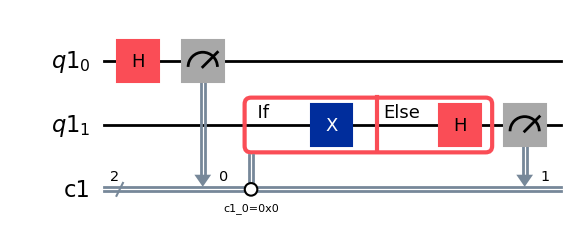

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

q0, q1 = qr
b0, b1 = cr

qc = QuantumCircuit(qr, cr)
qc.h(q0)
qc.measure(q0, b0)

with qc.if_test((b0, 0)) as else_:
    qc.x(q1)
with else_:
    qc.h(q1)


qc.measure(q1, b1)
qc.draw(output="mpl", idle_wires=False)

In [9]:
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector, StabilizerState, Clifford
from qiskit import QuantumCircuit
from qiskit.quantum_info.analysis import Z2Symmetries

# Define the XX operator
X = Pauli('X')
operator = X ^ X
print("As Pauli Op: ", operator)
operator = SparsePauliOp('XX')
print("As Sparse Pauli Op: ", operator)

# Define a more complex operator
operator = SparsePauliOp.from_list([("IZI", 0.39), ("IXX", 0.5)])
print("As Sparse Pauli Op: ", operator)

# Define the HH operator
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
print(qc)

operator = Clifford(qc).to_operator()
print("Operator: ", operator)

# Stabilizer states
qc_zero = QuantumCircuit(1)
qc_one = qc_zero.copy()
qc_one.x(0)
state1 = Statevector(qc_zero) ^ Statevector(qc_one)
print("State 1: ", state1)

qc_plus = qc_zero.copy()
qc_plus.h(0)
qc_minus = qc_one.copy()
qc_minus.h(0)
state2 = StabilizerState(qc_plus) ^ StabilizerState(qc_minus)
print("State 2: ", state2)

# PauliSumOp
qubit_op = SparsePauliOp(Pauli("XYZY"), coeffs=[-6j])
print(repr(qubit_op))

#  Z2Symmetries and TaperedPauliSumOp
qubit_op = SparsePauliOp.from_list(
    [
        ("II", -1.0537076071291125),
        ("IZ", 0.393983679438514),
        ("ZI", -0.39398367943851387),
        ("ZZ", -0.01123658523318205),
        ("XX", 0.1812888082114961),
    ]
)
z2_symmetries = Z2Symmetries.find_z2_symmetries(qubit_op)
print(z2_symmetries)

tapered_op = z2_symmetries.taper(qubit_op)
print("Tapered Op from Z2 symmetries: ", tapered_op)


As Pauli Op:  XX
As Sparse Pauli Op:  SparsePauliOp(['XX'],
              coeffs=[1.+0.j])
As Sparse Pauli Op:  SparsePauliOp(['IZI', 'IXX'],
              coeffs=[0.39+0.j, 0.5 +0.j])
     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘
Operator:  Operator([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
          [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
State 1:  Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
State 2:  StabilizerState(['-IX', '+XI'])
SparsePauliOp(['XYZY'],
              coeffs=[0.-6.j])
Z2 symmetries:
Symmetries:
ZZ
Single-Qubit Pauli X:
IX
Cliffords:
SparsePauliOp(['ZZ', 'IX'],
              coeffs=[0.70710678+0.j, 0.70710678+0.j])
Qubit index:
[0]
Tapering values:
  - Possible values: [1], [-1]
Tapered Op from Z2 symmetries:  [SparsePauliOp(['I', 'X'],
              coeffs=[-1.06494419+0.j,  0

In [5]:

from qiskit.opflow import CircuitStateFn, PauliSumOp
from qiskit.utils import QuantumInstance
from qiskit.algorithms import EvolvedOp

# Define Hamiltonian
#  Hamiltonian for a simple system
hamiltonian = PauliSumOp.from_list([('ZI', -1.0), ('IZ', -1.0), ('ZZ', 0.5)])

# Step 2: Define initial state
# Prepare a simple initial state
initial_state = CircuitStateFn(QuantumCircuit(2).h(0))

# Step 3: Simulate time evolution
# Example: Evolve the initial state under the Hamiltonian
time_evolution = EvolvedOp(initial_state, hamiltonian)

# Set up the quantum instance for simulation
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend)

# Execute the simulation
result = time_evolution.eval()

# Step 4: Calculate Gibbs free energy
# Example: Calculate Gibbs free energy assuming T=1
temperature = 1.0
gibbs_free_energy = result.adjoint().compose(hamiltonian).eval() - temperature * result.expectation_value(hamiltonian.adjoint())

print("Estimated Gibbs Free Energy:", gibbs_free_energy)


ModuleNotFoundError: No module named 'qiskit.opflow'

In [6]:

from qiskit.opflow import CircuitStateFn, PauliSumOp
from qiskit.utils import QuantumInstance
from qiskit.algorithms import EvolvedOp
import numpy as np

# Step 1: Define time-dependent Hamiltonian
def time_dependent_hamiltonian(t):
    # Example: time-dependent Hamiltonian for a simple system
    return PauliSumOp.from_list([('ZI', -1.0 * np.cos(t)), ('IZ', -1.0 * np.sin(t)), ('ZZ', 0.5 * np.cos(t))])

# Step 2: Create dynamic circuits
def create_dynamic_circuit(t):
    circuit = QuantumCircuit(2)
    # Example: Apply time-dependent operations
    circuit.rz(t, 0)
    circuit.rx(t, 1)
    return CircuitStateFn(circuit)

# Step 3: Simulate time evolution
# Example: Evolve the initial state under the time-dependent Hamiltonian
evolution_op = EvolvedOp(create_dynamic_circuit, time_dependent_hamiltonian)

# Set up the quantum instance for simulation
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend)

# Execute the simulation
result = evolution_op.eval(0.5)  # Example: Evolve for time t = 0.5

# Step 4: Calculate Gibbs free energy
# Example: Calculate Gibbs free energy assuming T=1
temperature = 1.0
gibbs_free_energy = result.adjoint().compose(time_dependent_hamiltonian(0.5)).eval() - temperature * result.expectation_value(time_dependent_hamiltonian(0.5).adjoint())

print("Estimated Gibbs Free Energy:", gibbs_free_energy)


ModuleNotFoundError: No module named 'qiskit.opflow'

In [8]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np

# Step 1: Define time-dependent Hamiltonian
def time_dependent_hamiltonian(t):
    # Example: time-dependent Hamiltonian for a simple system
    # Constructing a matrix representation of the Hamiltonian
    hamiltonian_matrix = np.array([
        [-np.cos(t), 0, 0, 0],
        [0, np.sin(t), 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, np.cos(t)]
    ])
    return hamiltonian_matrix

# Step 2: Create dynamic circuits
def create_dynamic_circuit(t):
    circuit = QuantumCircuit(2)
    # Apply time-dependent operations
    circuit.rz(t, 0)
    circuit.rx(t, 1)
    return circuit

# Step 3: Simulate time evolution
def simulate_time_evolution(t):
    # Create the quantum circuit
    dynamic_circuit = create_dynamic_circuit(t)

    # Obtain the time-dependent Hamiltonian matrix
    hamiltonian_matrix = time_dependent_hamiltonian(t)

    # Simulate the quantum circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(dynamic_circuit, backend)
    result = job.result()
    statevector = result.get_statevector(dynamic_circuit)

    # Apply time evolution using the Hamiltonian matrix
    evolved_state = np.dot(hamiltonian_matrix, statevector)

    return evolved_state

# Step 4: Calculate Gibbs free energy
def calculate_gibbs_free_energy(t, temperature):
    evolved_state = simulate_time_evolution(t)
    hamiltonian_matrix = time_dependent_hamiltonian(t)
    gibbs_free_energy = np.dot(evolved_state.conj().T, hamiltonian_matrix).trace() - temperature * np.log(np.trace(np.exp(-hamiltonian_matrix / temperature)))
    return gibbs_free_energy

# Example: Calculate Gibbs free energy for time t = 0.5 and temperature T = 1
t = 0.5
temperature = 1.0
gibbs_free_energy = calculate_gibbs_free_energy(t, temperature)

print("Estimated Gibbs Free Energy:", gibbs_free_energy)

import numpy as np

# Step 1: Define time-dependent Hamiltonian
def time_dependent_hamiltonian(t):
    # Example: time-dependent Hamiltonian for a simple system
    # Constructing a matrix representation of the Hamiltonian
    hamiltonian_matrix = np.array([
        [-np.cos(t), 0, 0, 0],
        [0, np.sin(t), 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, np.cos(t)]
    ])
    return hamiltonian_matrix

# Step 2: Create dynamic circuits
def create_dynamic_circuit(t):
    circuit = QuantumCircuit(2)
    # Apply time-dependent operations
    circuit.rz(t, 0)
    circuit.rx(t, 1)
    return circuit

# Step 3: Simulate time evolution
def simulate_time_evolution(t):
    # Create the quantum circuit
    dynamic_circuit = create_dynamic_circuit(t)

    # Obtain the time-dependent Hamiltonian matrix
    hamiltonian_matrix = time_dependent_hamiltonian(t)

    # Simulate the quantum circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(dynamic_circuit, backend)
    result = job.result()
    statevector = result.get_statevector(dynamic_circuit)

    # Apply time evolution using the Hamiltonian matrix
    evolved_state = np.dot(hamiltonian_matrix, statevector)

    return evolved_state

# Step 4: Calculate Gibbs free energy
def calculate_gibbs_free_energy(t, temperature):
    evolved_state = simulate_time_evolution(t)
    hamiltonian_matrix = time_dependent_hamiltonian(t)
    gibbs_free_energy = np.dot(evolved_state.conj().T, hamiltonian_matrix).trace() - temperature * np.log(np.trace(np.exp(-hamiltonian_matrix / temperature)))
    return gibbs_free_energy

# Example: Calculate Gibbs free energy for time t = 0.5 and temperature T = 1
t = 0.5
temperature = 1.0
gibbs_free_energy = calculate_gibbs_free_energy(t, temperature)

print("Estimated Gibbs Free Energy:", gibbs_free_energy)


ImportError: cannot import name 'Aer' from 'qiskit' (/usr/local/lib/python3.10/dist-packages/qiskit/__init__.py)